In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('adult.csv')

In [3]:
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.drop_duplicates(inplace=True)


In [5]:
for i in data.columns:
    print(i,":",data[i].nunique(),"\n",data[i].unique())
    

age : 73 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : 9 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : 21648 
 [ 77516  83311 215646 ...  34066  84661 257302]
education : 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num : 16 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : 7 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : 15 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' '

In [9]:
data[(data["workclass"]==" ?")].shape


(1836, 15)

In [7]:
data[(data["occupation"]==" ?")].shape

(1843, 15)

In [10]:
data[(data["country"]==" ?")].shape

(582, 15)

In [11]:
data["workclass"] = data["workclass"].replace(' ?', np.nan)
data["workclass"]=data["workclass"].fillna(data["workclass"].mode()[0])

In [12]:
data["occupation"] = data["occupation"].replace(' ?', np.nan)
data["occupation"]=data["occupation"].fillna(data["occupation"].mode()[0])

In [13]:
data["country"] = data["country"].replace(' ?', np.nan)
data["country"]=data["country"].fillna(data["country"].mode()[0])

In [15]:
# Createing binary target variable (1 for >50K and 0 for <=50K)
def map_salary(salary_value):
    if salary_value.strip() == '>50K':
        return 1
    else:
        return 0
    
data['salary'] = data['salary'].apply(map_salary)

AttributeError: 'int' object has no attribute 'strip'

C:\Users\ankup\AppData\Local\Temp\ipykernel_11980\1895024945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="CMRmap", annot=True)


<Axes: >

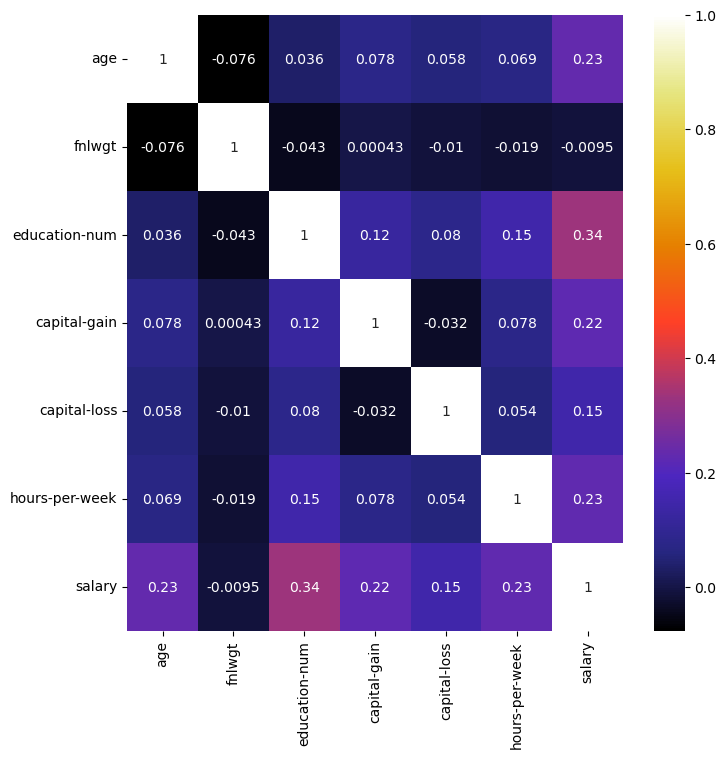

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)

In [17]:
data.drop(['fnlwgt'],axis=1,inplace=True)

In [18]:
# Encode categorical features using Label Encoding
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','country']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [20]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


<Axes: >

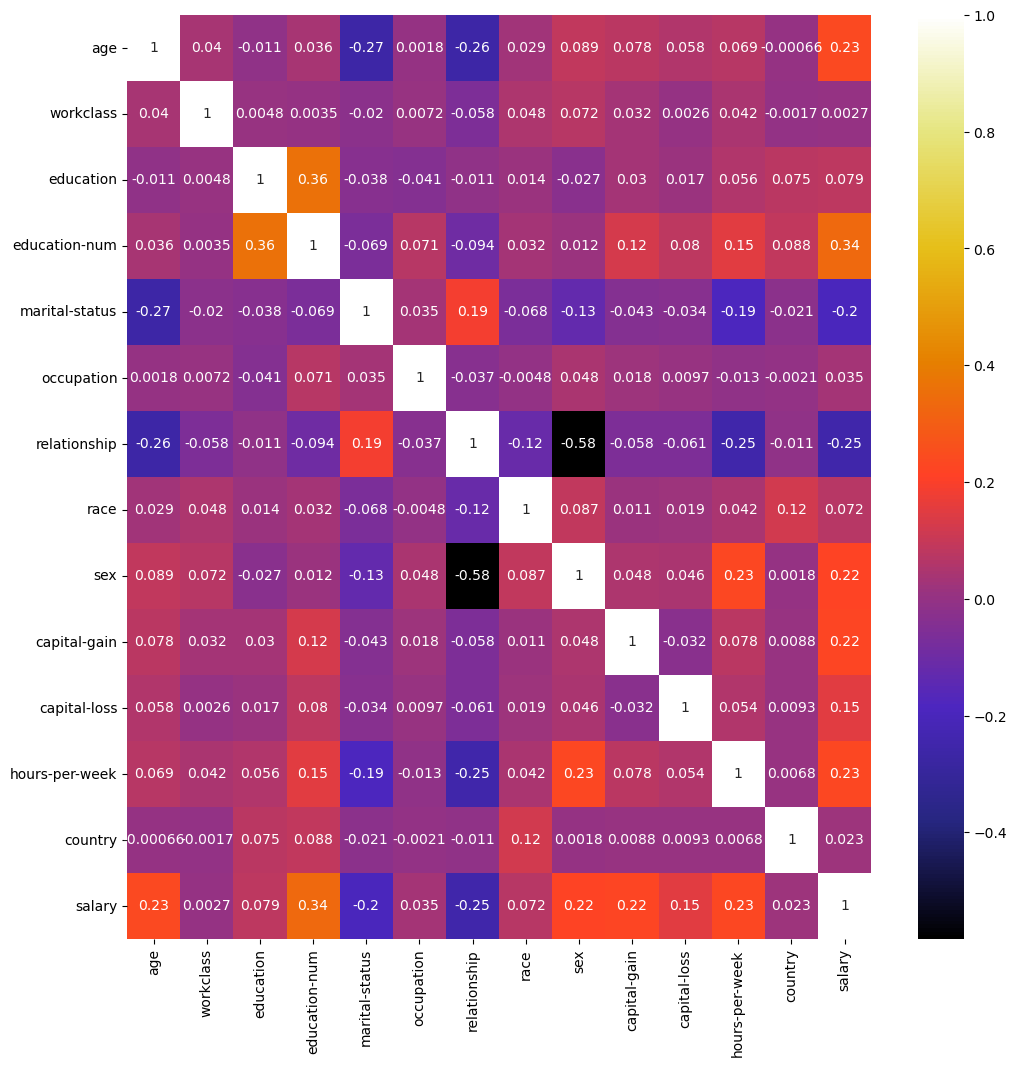

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)

In [22]:
data.drop(['relationship','capital-gain','capital-loss'],axis=1,inplace=True)